# Problem Statement
The objective is to optimize the operational efficiency of the UR3 cobot by analyzing sensor data to identify patterns that can improve task performance, reduce downtime, and enhance decision-making processes , The dataset includes multidimensional time-series data from the UR3 cobot, offering insights into operational parameters and faults for machine learning in robotics and automation.

# Why This Problem?
Inefficiency in Operations: In industrial settings, cobots may not be operating at their full potential due to unoptimized paths, improper task scheduling, or unforeseen errors.
Data-Driven Insights: Without analyzing the vast amounts of sensor data collected from the cobot, opportunities for improvement can be missed, leading to increased operational costs and reduced productivity.
Predictive Maintenance: Identifying potential failures or maintenance needs through data analysis can prevent costly downtime and extend the lifespan of the equipment.

# Analysis and Methodology
The project employs clustering techniques to analyze the UR3 CobotOps dataset. The primary methodology involves:

Data Pre-processing: Handling missing values, normalizing data, and encoding categorical variables.
Clustering: Applying various clustering algorithms to identify patterns and anomalies.
Visualization: Creating visualizations to interpret the clustering results.





In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [67]:
read_file = pd.read_excel("dataset_02052023.xlsx")
read_file.to_csv("dataset_02052023.csv",index=None,header=True)
df=pd.DataFrame(pd.read_csv("dataset_02052023.csv"))
df

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.8750,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26T08:17:22.852Z,0.595605,27.8750,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.8750,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26T08:17:24.863Z,0.065053,27.8750,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26T08:17:25.877Z,0.884140,27.8750,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,7405,2022-10-26T15:36:02.555Z,-0.109017,37.1875,-2.261695,40.3125,-1.082678,40.6875,-0.494714,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.080013,264,0.0,False
7405,7406,2022-10-26T15:36:03.562Z,-0.098536,37.1875,-2.251992,40.3125,-1.094420,40.6875,-0.515789,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.078740,264,0.0,False
7406,7407,2022-10-26T15:36:04.571Z,-0.121100,37.1875,-2.280791,40.2500,-1.121319,40.6875,-0.502406,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.091471,264,0.0,False
7407,7408,2022-10-26T15:36:05.572Z,-0.129370,37.1875,-2.269061,40.3125,-1.091610,40.6250,-0.491158,43.3750,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.090026,264,0.0,False


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num                   7409 non-null   int64  
 1   Timestamp             7409 non-null   object 
 2   Current_J0            7363 non-null   float64
 3   Temperature_T0        7355 non-null   float64
 4   Current_J1            7355 non-null   float64
 5   Temperature_J1        7355 non-null   float64
 6   Current_J2            7355 non-null   float64
 7   Temperature_J2        7355 non-null   float64
 8   Current_J3            7355 non-null   float64
 9   Temperature_J3        7355 non-null   float64
 10  Current_J4            7355 non-null   float64
 11  Temperature_J4        7355 non-null   float64
 12  Current_J5            7355 non-null   float64
 13  Temperature_J5        7355 non-null   float64
 14  Speed_J0              7355 non-null   float64
 15  Speed_J1             

In [69]:
print(df.isnull().sum())

Num                      0
Timestamp                0
Current_J0              46
Temperature_T0          54
Current_J1              54
Temperature_J1          54
Current_J2              54
Temperature_J2          54
Current_J3              54
Temperature_J3          54
Current_J4              54
Temperature_J4          54
Current_J5              54
Temperature_J5          54
Speed_J0                54
Speed_J1                54
Speed_J2                54
Speed_J3                54
Speed_J4                54
Speed_J5                54
Tool_current            54
cycle                    0
Robot_ProtectiveStop    54
grip_lost                0
dtype: int64


In [70]:
# Convert 'grip_lost'  to float
# This is done to ensure consistency by having same datatypes as well as for ease of using mathematical operations that required numerical values
df['grip_lost'] = df['grip_lost'].astype(float)
df['Robot_ProtectiveStop'] = df['Robot_ProtectiveStop'].astype(float)

In [71]:
# Calculate the proportion of missing values to decide if we need to drop them or replace with mean
missing_proportion = df.isnull().mean()
print(missing_proportion)

Num                     0.000000
Timestamp               0.000000
Current_J0              0.006209
Temperature_T0          0.007288
Current_J1              0.007288
Temperature_J1          0.007288
Current_J2              0.007288
Temperature_J2          0.007288
Current_J3              0.007288
Temperature_J3          0.007288
Current_J4              0.007288
Temperature_J4          0.007288
Current_J5              0.007288
Temperature_J5          0.007288
Speed_J0                0.007288
Speed_J1                0.007288
Speed_J2                0.007288
Speed_J3                0.007288
Speed_J4                0.007288
Speed_J5                0.007288
Tool_current            0.007288
cycle                   0.000000
Robot_ProtectiveStop    0.007288
grip_lost               0.000000
dtype: float64


In [72]:
# Print the total number of rows in the dataset
# Remove rows with null values
# We decided to drop the rows since more than 20 columns were having null values for these rows.
df.dropna(inplace=True)
df.isnull().sum()
print(f'Checking length of the entire data frame {len(df)}')

Checking length of the entire data frame 7355


In [73]:
# Drop the 'Timestamp' and 'Num' columns
df.drop(columns=['Timestamp', 'Num'], inplace=True)
df.corr()

,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
Current_J0,1.000000,-0.009314,0.022532,-0.009484,0.058976,-0.009825,-0.314995,-0.009981,-0.758236,-0.009885,...,0.043615,-0.226628,0.356381,-0.244565,-0.008498,0.261849,0.053898,-0.007991,0.018110,0.012481
Temperature_T0,-0.009314,1.000000,-0.023205,0.999462,-0.019163,0.998795,-0.006077,0.996209,0.010335,0.993953,...,0.001965,0.000749,-0.000443,0.004419,0.002351,-0.004765,0.001704,0.918589,0.058720,-0.087198
Current_J1,0.022532,-0.023205,1.000000,-0.023018,0.665123,-0.022582,0.389860,-0.022531,-0.109582,-0.023206,...,0.391095,0.091001,-0.083808,-0.179593,-0.196619,0.020599,0.104208,-0.019799,-0.108608,0.064817
Temperature_J1,-0.009484,0.999462,-0.023018,1.000000,-0.018798,0.999680,-0.005082,0.997606,0.010388,0.995650,...,0.001326,0.000901,0.000140,0.005230,0.002420,-0.005396,0.001870,0.912878,0.058526,-0.088532
Current_J2,0.058976,-0.019163,0.665123,-0.018798,1.000000,-0.018252,0.424019,-0.018573,-0.079308,-0.019452,...,0.098587,-0.088891,0.219213,-0.410194,-0.059585,0.439471,0.119936,-0.014799,-0.108862,0.070432
Temperature_J2,-0.009825,0.998795,-0.022582,0.999680,-0.018252,1.000000,-0.005140,0.998766,0.010502,0.997359,...,0.001579,0.001117,-0.000202,0.004668,0.002322,-0.004970,0.002328,0.904232,0.057937,-0.090443
Current_J3,-0.314995,-0.006077,0.389860,-0.005082,0.424019,-0.005140,1.000000,-0.004903,0.151713,-0.005689,...,-0.167056,0.224123,-0.198596,0.380436,0.090220,-0.328304,0.009071,-0.003707,-0.066140,-0.022318
Temperature_J3,-0.009981,0.996209,-0.022531,0.997606,-0.018573,0.998766,-0.004903,1.000000,0.011062,0.999487,...,0.001316,0.001602,0.000154,0.004459,0.002289,-0.004786,0.002182,0.886734,0.056056,-0.095095
Current_J4,-0.758236,0.010335,-0.109582,0.010388,-0.079308,0.010502,0.151713,0.011062,1.000000,0.010967,...,0.008175,0.278766,-0.109017,0.092377,-0.056203,-0.101316,-0.114459,0.007584,0.017204,-0.018903
Temperature_J4,-0.009885,0.993953,-0.023206,0.995650,-0.019452,0.997359,-0.005689,0.999487,0.010967,1.000000,...,0.001704,0.001544,0.000212,0.003689,0.001786,-0.004147,0.002029,0.874086,0.056079,-0.095771


In [74]:
# Print the total number of rows in the dataset
# Select columns for normalization (excluding 'grip_lost' and 'Robot_ProtectiveStop')
# removed these two columns since normalizing binary data does not make sense
columns_to_normalize = df.columns.difference(['grip_lost', 'Robot_ProtectiveStop'])
columns_to_normalize
print(f'Checking length of the entire data frame {len(df)}')

Checking length of the entire data frame 7355


In [75]:
df.dtypes

Current_J0              float64
Temperature_T0          float64
Current_J1              float64
Temperature_J1          float64
Current_J2              float64
Temperature_J2          float64
Current_J3              float64
Temperature_J3          float64
Current_J4              float64
Temperature_J4          float64
Current_J5              float64
Temperature_J5          float64
Speed_J0                float64
Speed_J1                float64
Speed_J2                float64
Speed_J3                float64
Speed_J4                float64
Speed_J5                float64
Tool_current            float64
cycle                     int64
Robot_ProtectiveStop    float64
grip_lost               float64
dtype: object

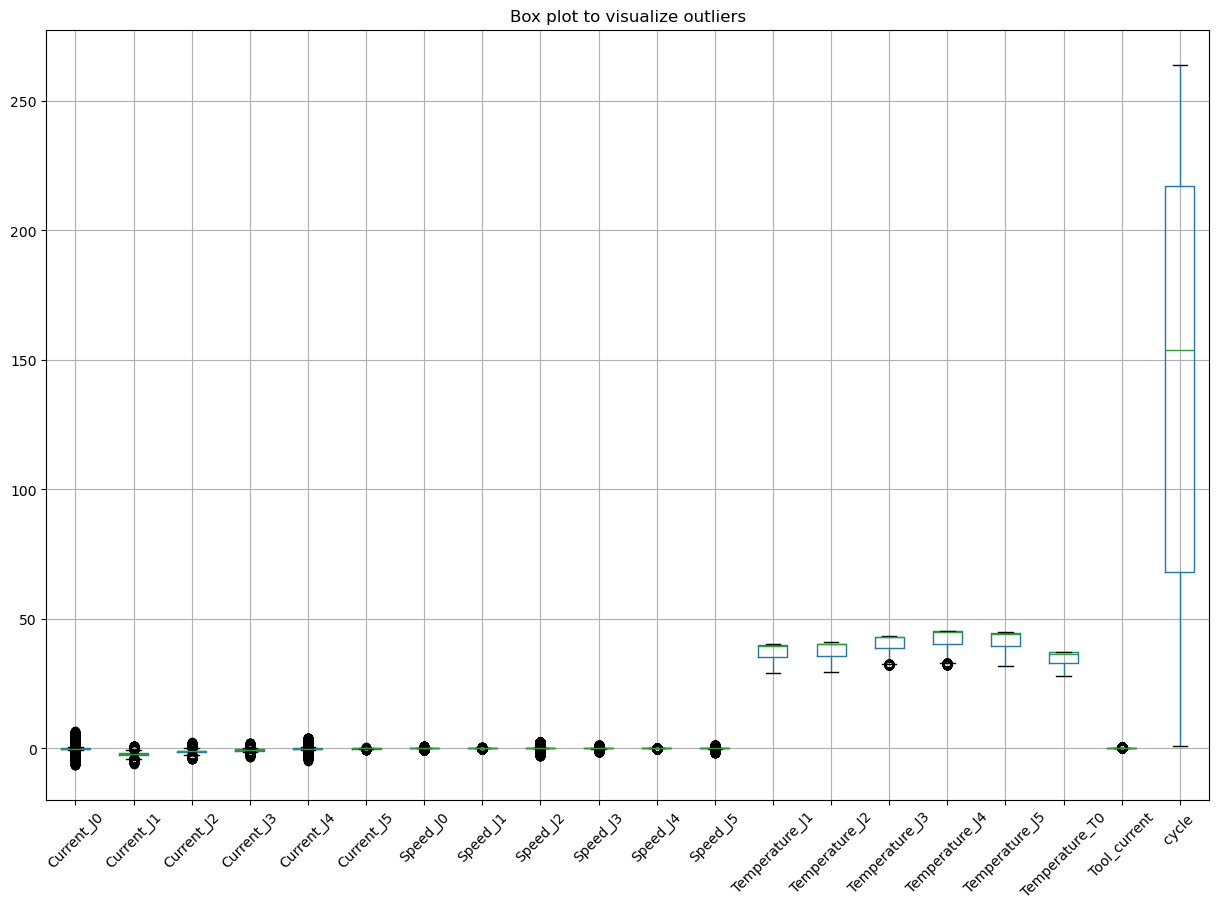

In [76]:
# Show the plot
# Visualize outliers using box plots
plt.figure(figsize=(15, 10))
df[columns_to_normalize].boxplot(rot=45)
plt.title('Box plot to visualize outliers')
plt.show()

In [77]:
# Print the total number of rows in the dataset
# Remove outliers using IQR method
# IQR (Interquartile Range): It describes the spread of the middle 50% of the dataset.
Q1 = df[columns_to_normalize].quantile(0.25)
Q3 = df[columns_to_normalize].quantile(0.75)
IQR = Q3 - Q1

# Display Q1, Q3, and IQR for verification
print("Q1:\n", Q1)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQR)

print(f'Checking length of the entire data frame {len(df)}')

# wide spread in the number of cycles observed in the dataset.
# Columns with smaller IQRs (Temperature_J3, Temperature_T0) have less variability in their temperature measurements.
# Columns with larger IQRs (Temperature_J4, Temperature_J5) show more variability, indicating a wider range of temperature readings.

Q1:
 Current_J0        -0.195121
Current_J1        -2.664919
Current_J2        -1.552803
Current_J3        -0.830933
Current_J4        -0.125809
Current_J5        -0.094875
Speed_J0          -0.000483
Speed_J1          -0.000659
Speed_J2          -0.004100
Speed_J3          -0.005365
Speed_J4          -0.000120
Speed_J5          -0.000803
Temperature_J1    35.375000
Temperature_J2    35.750000
Temperature_J3    38.937500
Temperature_J4    40.375000
Temperature_J5    39.500000
Temperature_T0    33.000000
Tool_current       0.082387
cycle             68.000000
Name: 0.25, dtype: float64

Q3:
 Current_J0          0.095239
Current_J1         -1.778334
Current_J2         -0.838721
Current_J3         -0.388398
Current_J4          0.086098
Current_J5          0.077995
Speed_J0            0.002115
Speed_J1            0.000540
Speed_J2            0.000205
Speed_J3            0.009912
Speed_J4            0.000066
Speed_J5            0.012924
Temperature_J1     40.125000
Temperature_J2     40.437

In [78]:
# Print the total number of rows in the dataset
print(f'Checking length of the entire data frame {len(df)}')

# Create a dictionary to store the counts
value_distribution = {}

# Check for positive, negative, and zero values
for column in columns_to_normalize:
    num_positive = (df[column] > 0).sum()
    num_negative = (df[column] < 0).sum()
    num_zero = (df[column] == 0).sum()

    # Store the counts in the dictionary
    value_distribution[column] = {
        'positive': num_positive,
        'zero': num_zero,
        'negative': num_negative
    }

# Convert the dictionary to a DataFrame for better visualization
value_distribution_df = pd.DataFrame(value_distribution).T

# Display the distribution of values
print(value_distribution_df)

# Applying capping to handle outliers 
for col in columns_to_normalize: 
    lower_bound = Q1[col] - 1.5 * IQR[col] 
    upper_bound = Q3[col] + 1.5 * IQR[col] 
    df[col] = df[col].apply(lambda x: max(min(x, upper_bound), lower_bound))

print(f'Checking length of the entire data frame {len(df)}')

# The lambda function lambda x: max(min(x, upper_bound), lower_bound) is applied to each value in the column col.
# This function ensures that any value x outside the range [lower_bound, upper_bound] 
# is capped (replaced) by the nearest boundary value (lower_bound if x is less than lower_bound, or upper_bound if x is greater than upper_bound).

# Z-score Method: Assumes data follows a normal distribution, may not work well for skewed or non-normal distributions.
# Percentile Capping: Can remove genuine extreme values if they are not outliers but rather represent rare events or significant data points.
# Transformation: Data interpretation becomes challenging, as transformed values may not directly relate to the original scale.
# IQR : Loss of sensitive data that may not be outlier,heavily skewed data may not be accurately capped.

Checking length of the entire data frame 7355
                positive  zero  negative
Current_J0          2670     0      4685
Current_J1            65     0      7290
Current_J2           149     0      7206
Current_J3           439     0      6916
Current_J4          3404     0      3951
Current_J5          4004     0      3351
Speed_J0            2607  2349      2399
Speed_J1            2485  2342      2528
Speed_J2            2160  2373      2822
Speed_J3            2685  2008      2662
Speed_J4            2217  2762      2376
Speed_J5            2787  2178      2390
Temperature_J1      7355     0         0
Temperature_J2      7355     0         0
Temperature_J3      7355     0         0
Temperature_J4      7355     0         0
Temperature_J5      7355     0         0
Temperature_T0      7355     0         0
Tool_current        7355     0         0
cycle               7355     0         0
Checking length of the entire data frame 7355


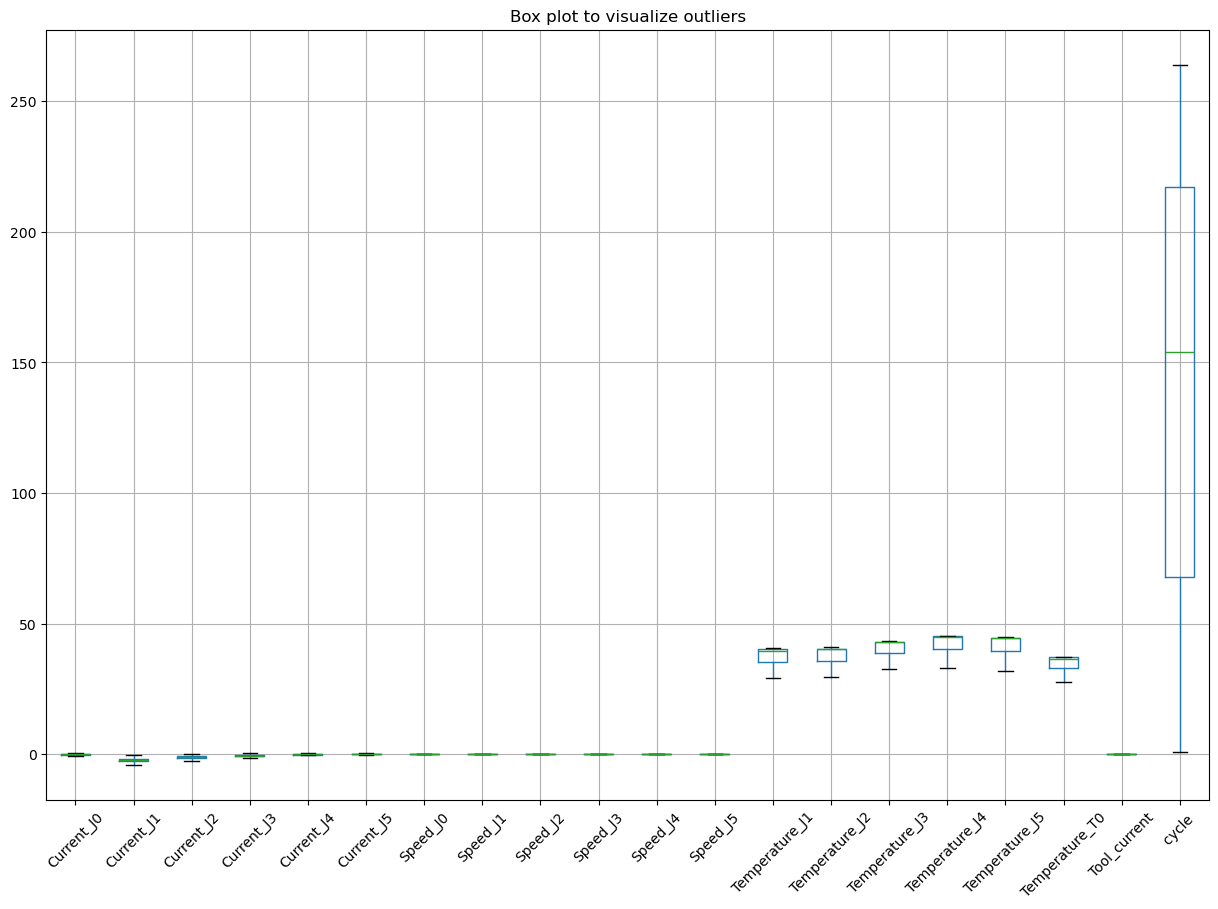

In [79]:
# Show the plot
# Visualize outliers using box plots
plt.figure(figsize=(15, 10))
df[columns_to_normalize].boxplot(rot=45)
plt.title('Box plot to visualize outliers')
plt.show()

In [80]:
# Adjust columns to be strictly positive
# ensure all values are strictly positive. even the smallest original value in each column becomes zero or greater.
df[columns_to_normalize] += 1 - df[columns_to_normalize].min()

In [81]:
from scipy.stats import skew

In [82]:
# Calculate skewness for each feature to understand their distributions
# Check skewness of the data
# This lambda function calculates the skewness of the values in each column.
# Skewness measures the asymmetry of the probability distribution of a real-valued random variable about its mean. 
# A skewness value of 0 indicates a symmetric distribution. Positive skewness indicates a right-skewed distribution (long tail on the right), 
# while negative skewness indicates a left-skewed distribution (long tail on the left).

skewness = df[columns_to_normalize].apply(lambda x: skew(x))
print("Skewness of the features before transformation:")
print(skewness)

Skewness of the features before transformation:
Current_J0        0.184037
Current_J1       -0.415395
Current_J2       -0.421319
Current_J3       -0.193719
Current_J4       -0.073090
Current_J5       -0.108831
Speed_J0          0.324150
Speed_J1         -0.065952
Speed_J2         -0.444059
Speed_J3          0.157459
Speed_J4         -0.152524
Speed_J5          0.450502
Temperature_J1   -1.012534
Temperature_J2   -1.047888
Temperature_J3   -1.132926
Temperature_J4   -1.150157
Temperature_J5   -1.084947
Temperature_T0   -1.006728
Tool_current      0.867255
cycle            -0.137223
dtype: float64


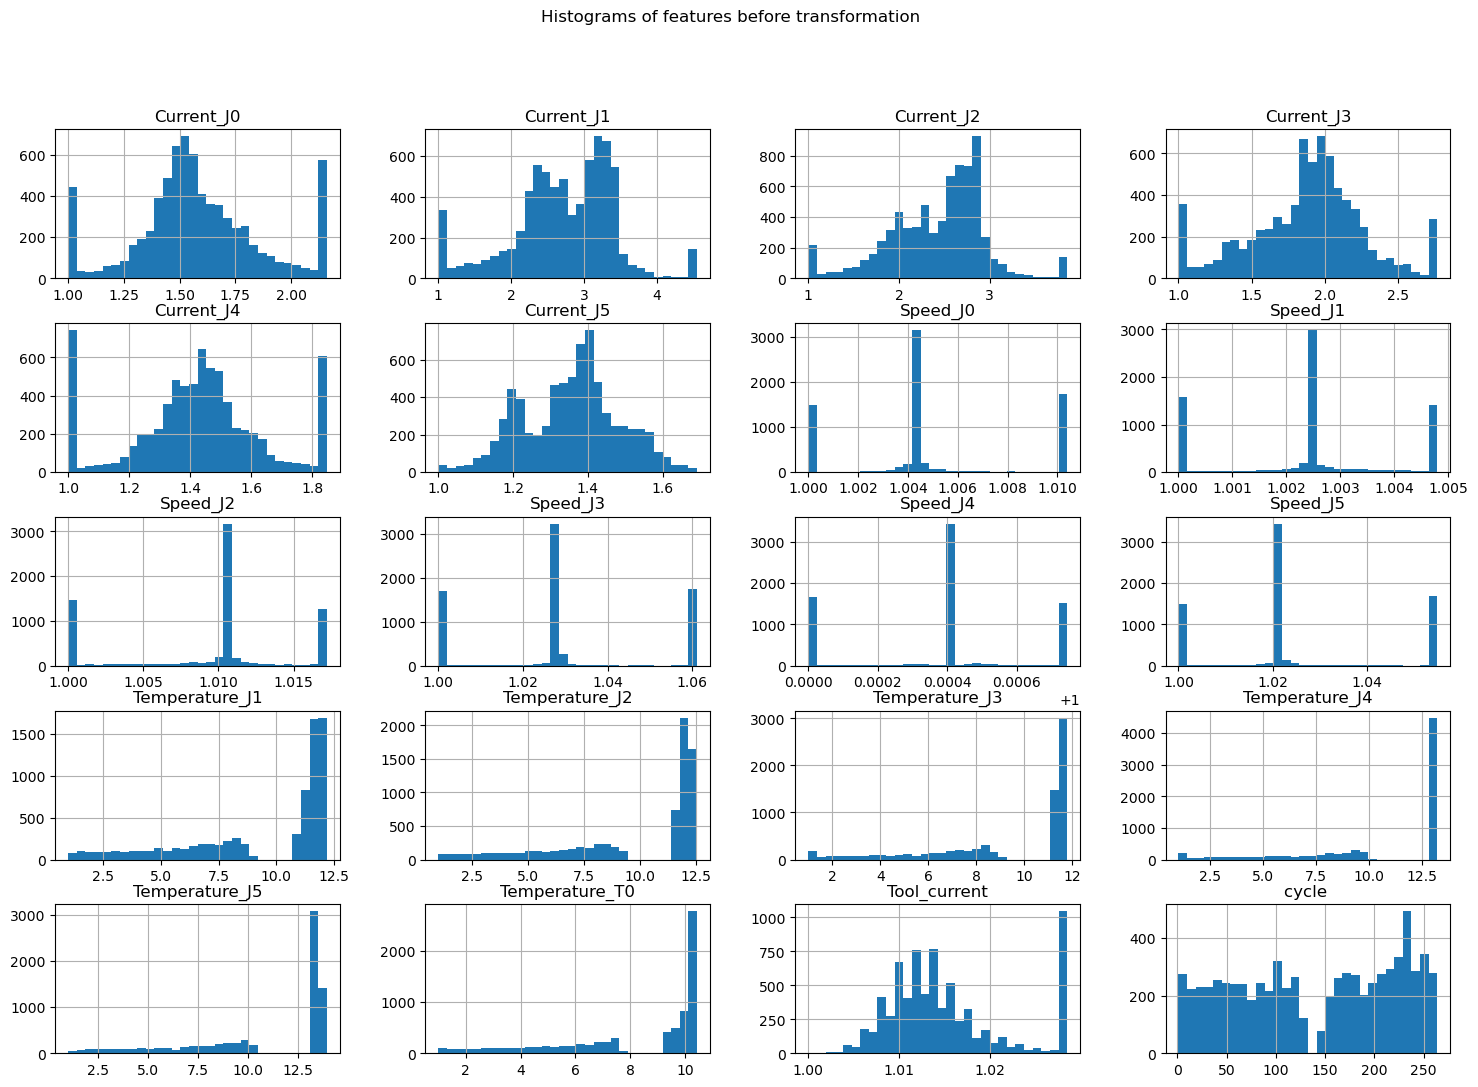

In [83]:
# Show the plot
# Visualize skewness using histograms
df[columns_to_normalize].hist(bins=30, figsize=(18, 12))
plt.suptitle('Histograms of features before transformation')
plt.show()

In [84]:
# Apply a power transform to make the data more Gaussian-like
# The Yeo-Johnson method is a technique for power transformation that can handle both positive and negative values, 
# unlike the Box-Cox method which requires strictly positive values.
from sklearn.preprocessing import PowerTransformer

# Instantiate the PowerTransformer with the Yeo-Johnson method
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation to the specified columns
df[columns_to_normalize] = pt.fit_transform(df[columns_to_normalize])

C:\Users\Rudraksha Ratne\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Rudraksha Ratne\anaconda3\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [85]:
# Calculate skewness for each feature to understand their distributions
# Check skewness after transformation
skewness_after = df[columns_to_normalize].apply(lambda x: skew(x))
print("Skewness of the features after transformation:")
print(skewness_after)

Skewness of the features after transformation:
Current_J0        0.003281
Current_J1        0.025743
Current_J2        0.045892
Current_J3        0.007154
Current_J4       -0.002756
Current_J5       -0.011944
Speed_J0          0.152428
Speed_J1         -0.008848
Speed_J2         -0.056726
Speed_J3          0.023522
Speed_J4         -0.042014
Speed_J5          0.069810
Temperature_J1   -0.624744
Temperature_J2   -0.644231
Temperature_J3   -0.683110
Temperature_J4   -0.704844
Temperature_J5   -0.671460
Temperature_T0   -0.604641
Tool_current      0.621303
cycle            -0.333345
dtype: float64


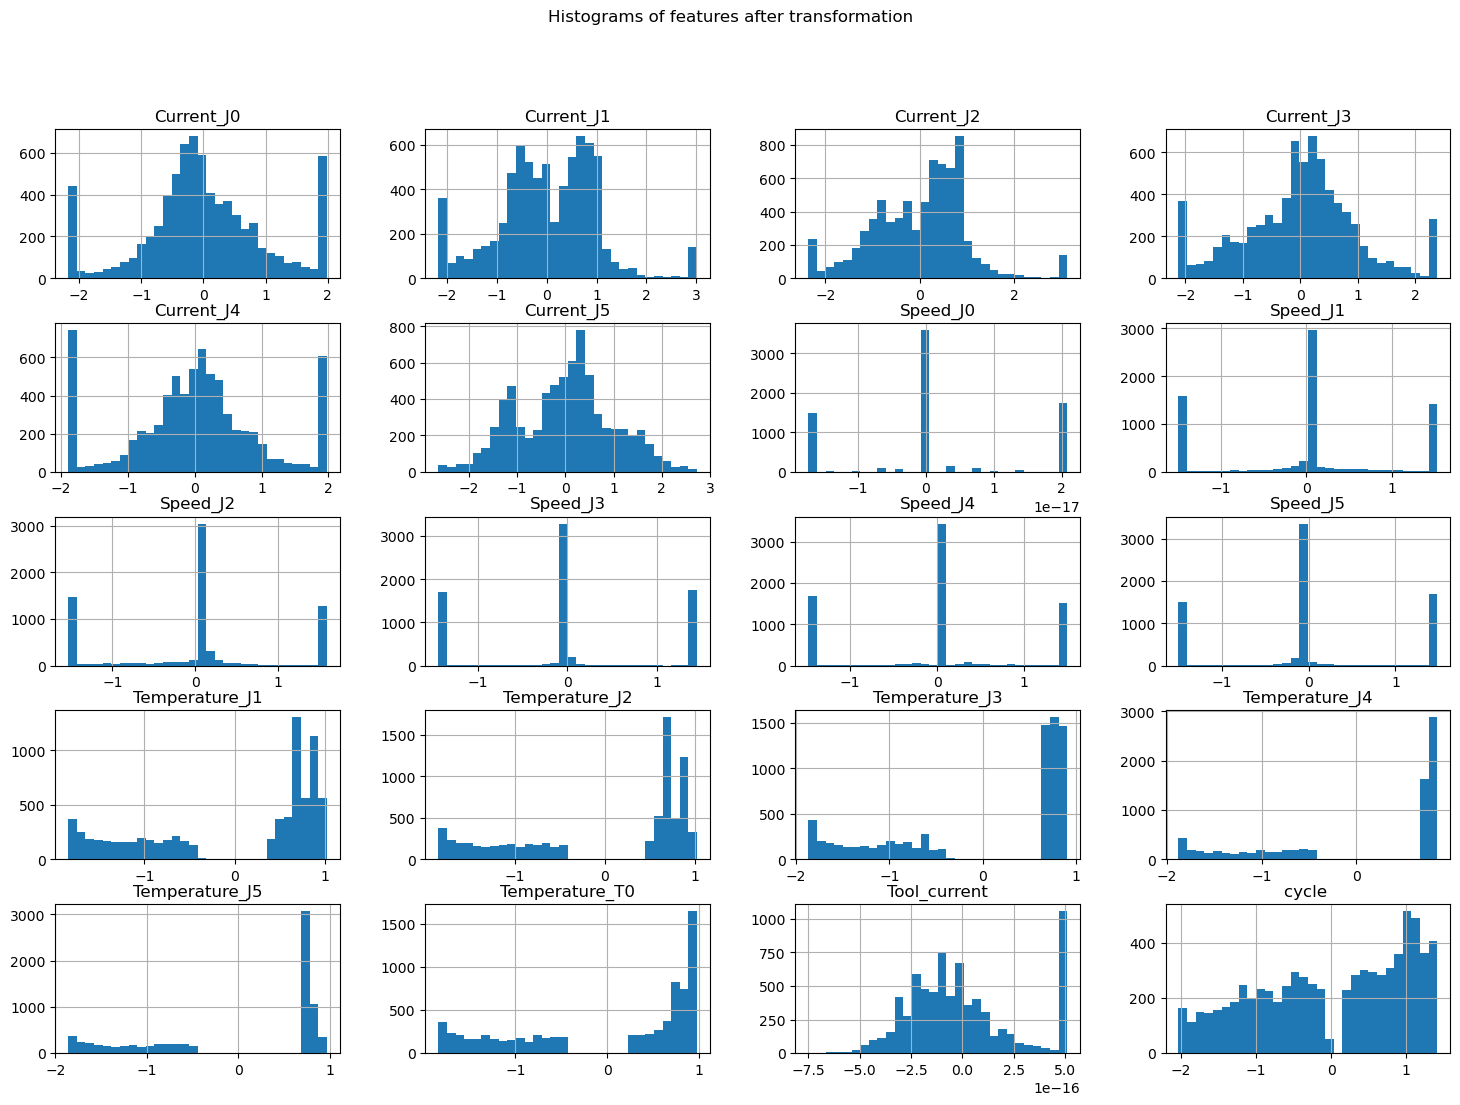

In [86]:
# Show the plot
# Visualize histograms after transformation
df[columns_to_normalize].hist(bins=30, figsize=(18, 12))
plt.suptitle('Histograms of features after transformation')
plt.show()

In [87]:
# Normalize the selected columns
# Normalization Adjusts the values in the dataset to a common scale without distorting differences in the ranges of values. 
# It typically refers to scaling data to a range between 0 and 1.
# Scaling used When features have different units of measurement and need to be on the same scale. 
# When applying algorithms that calculate distances between data points (e.g., clustering algorithms, K-Nearest Neighbors).
# MinMaxScaler scales features to a given range (by default between 0 and 1) 
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [88]:
# Print the first few rows of the dataframe
print(df.head())

   Current_J0  Temperature_T0  Current_J1  Temperature_J1  Current_J2  \
0    0.663538        0.001085    0.482234        0.000849    0.307184   
1    1.000000        0.001085    0.409192        0.000000    0.541024   
2    0.372776        0.001085    0.268643        0.000000    0.079514   
3    0.626416        0.001085    0.061556        0.000000    0.413291   
4    1.000000        0.001085    0.233626        0.000849    0.224357   

   Temperature_J2  Current_J3  Temperature_J3  Current_J4  Temperature_J4  \
0        0.000000    0.251721             0.0    0.438089             0.0   
1        0.000711    0.701344             0.0    0.000000             0.0   
2        0.000711    0.614798             0.0    0.000000             0.0   
3        0.000711    0.141892             0.0    0.000000             0.0   
4        0.000711    0.000000             0.0    0.000000             0.0   

   ...      Speed_J0  Speed_J1  Speed_J2  Speed_J3  Speed_J4  Speed_J5  \
0  ...  3.816392e-17  0.

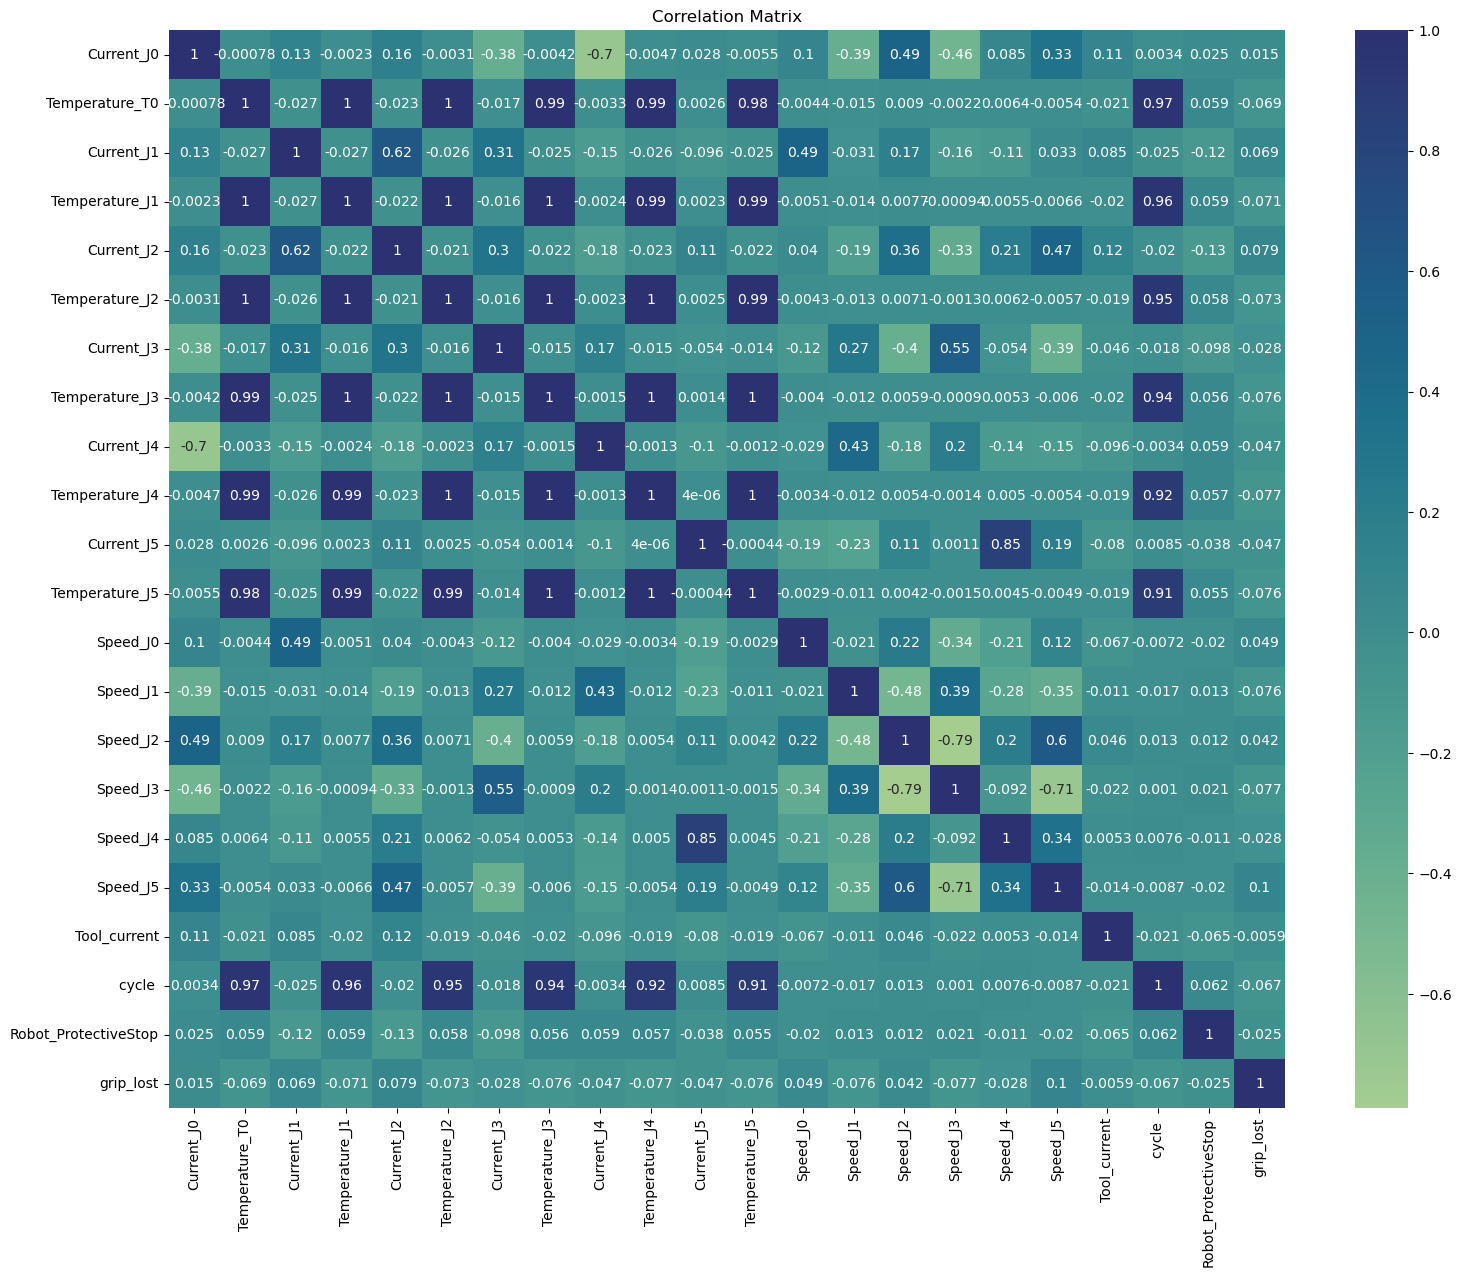

In [89]:
# Show the plot
# Plot the correlation matrix
plt.figure(figsize=(18, 14))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Correlation Matrix')
plt.show()

In [90]:
# Optional: Dimensionality Reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df)

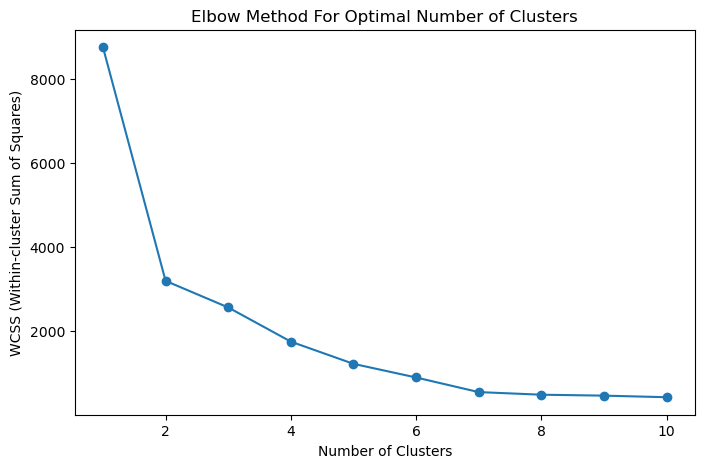

In [91]:
from sklearn.cluster import KMeans
# Elbow Method to find the optimal number of clusters
k_cluster = []  
wcss = [] # within-cluster sum of squares

for i in range(1, 11):  # Testing 2 to 20 clusters
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
    k_cluster.append(i)
    
# Show the plot
plt.figure(figsize=(8, 5))    
plt.plot(range(1, 11), wcss,marker="o")
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

In [92]:
# Apply K-Means clustering algorithm
# Choose the number of clusters (e.g., 2) based on the elbow plot
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_pca)
df['KMeans_Cluster'] = kmeans.labels_

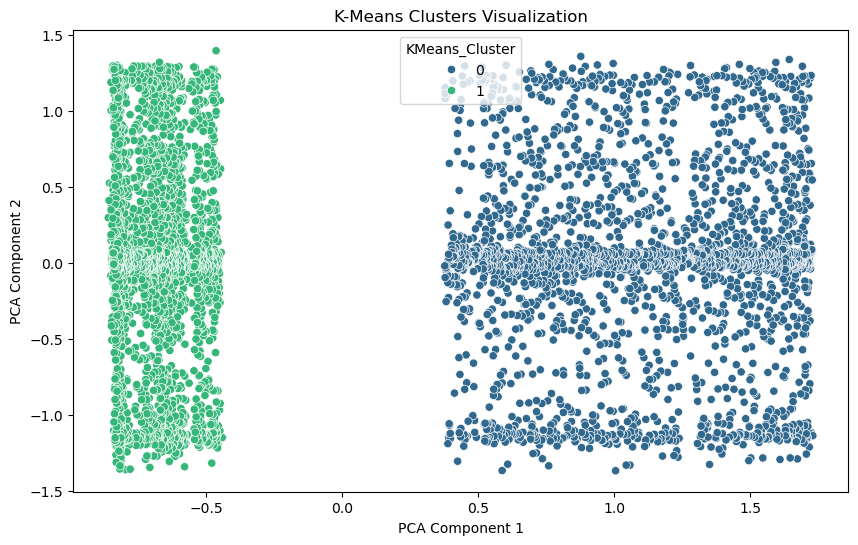

In [93]:
# Show the plot
# Visualize the K-Means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [94]:
# Analyze the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[ 1.09059163e+00,  1.54571200e-03],
       [-6.93505665e-01, -9.82916060e-04]])

In [95]:
# Apply K-Means clustering algorithm
# Print the silhouette score for K-Means
from sklearn.metrics import silhouette_score
kmeans_silhouette_avg = silhouette_score(data_pca, df['KMeans_Cluster'])
print(f'K-Means Silhouette Score: {kmeans_silhouette_avg}')

# K-Means Silhouette Score: 0.6102758974479

K-Means Silhouette Score: 0.6100853254637685
